In [1]:
using Plots

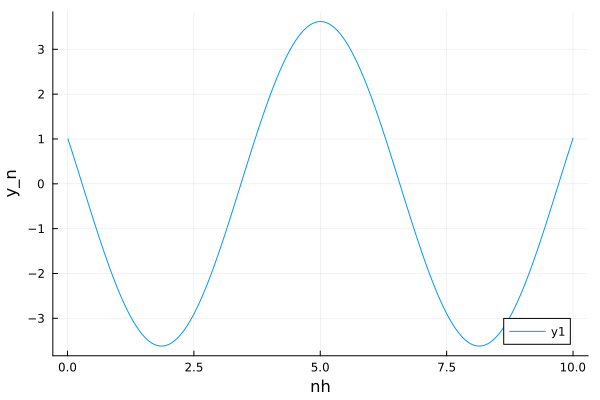

In [29]:
N=1000
h=0.01
diag = h*h-2
vector_up = [0; ones(N-2)]
vector_diagonal = [1; ones(N-2) * diag; -2]
vector_down = [ones(N-2); 1]
vector_b = [1; ones(N-2) * 0;-1]
function factorization(diagonal, v1, v2)
    n = length(diagonal)
    factor = 0.0

    for i in 2:n
        factor = v2[i-1] / diagonal[i-1]
        diagonal[i] -= factor * v1[i-1]
        v1[i-1] = factor
    end

    return v1, diagonal
end

lower_data_vector , upper_data_diagonale = factorization(vector_diagonal,vector_up,vector_down)

function solve(lower, upper, b)
    n = length(b)
    x = zeros(n)
    y = zeros(n)
    #forward substitution
    x[1] = b[1]
    for i in 2:n
        x[i] = -b[i] - lower[i-1] * x[i-1]
    end
    #backward substitution
    y[n]=x[n]
    y[1]=x[1]
    for i in n-1:-1:2
        y[i]=(x[i]-y[i+1])/upper[i]
    end
    return y
end

result = solve(lower_data_vector, upper_data_diagonale, vector_b)

x_values = 1:N;
y_values = [result[n] for n in x_values]
plot(x_values*h, y_values,xlabel="nh", ylabel="y_n", legend=:bottomright)
